<a href="https://colab.research.google.com/github/chayvw18/Statistics-Practice-Workbook/blob/main/deliveryTimes_TT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Practice

/content/drive/MyDrive/Practice


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_rel

In [6]:
deliveryTimes = pd.read_csv('/content/drive/MyDrive/Practice/ttest_delivery_times.csv')

Estimate the probability that the delivery times for Group A and Group B were drawn from the same distribution

In [13]:
deliveryTimes.head()

,Warehouse,DeliveryTime_Hours
0,A,50.483571
1,A,47.308678
2,A,51.238443
3,A,55.615149
4,A,46.829233


In [16]:
wearhouseMaskA = deliveryTimes['Warehouse'] == 'A'
wearhouseMaskB = deliveryTimes['Warehouse'] == 'B'

In [32]:
WarehouseA = deliveryTimes[wearhouseMaskA]
WarehouseB = deliveryTimes[wearhouseMaskB]

In [22]:
WarehouseB

,Warehouse,DeliveryTime_Hours
100,B,41.507776
101,B,47.476128
102,B,47.943713
103,B,45.186336
104,B,49.032286
...,...,...
195,B,52.311904
196,B,44.696855
197,B,50.922351
198,B,50.349252


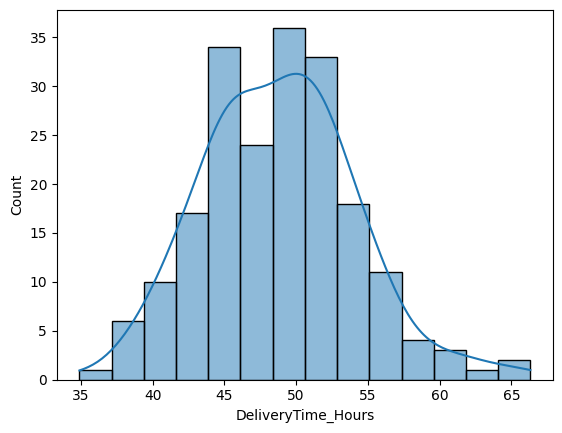

In [25]:
sns.histplot(data=deliveryTimes, x='DeliveryTime_Hours', kde=True);

From visual inspection it seems like the data is from a Guassian Distribution

In [27]:
stat, p = stats.shapiro(deliveryTimes['DeliveryTime_Hours'])
print(stat)
print('')
print(p)

0.9897812287234289

0.16597742870663984


p-value = 0.166 interpretation does not show significant evidence of being non normal

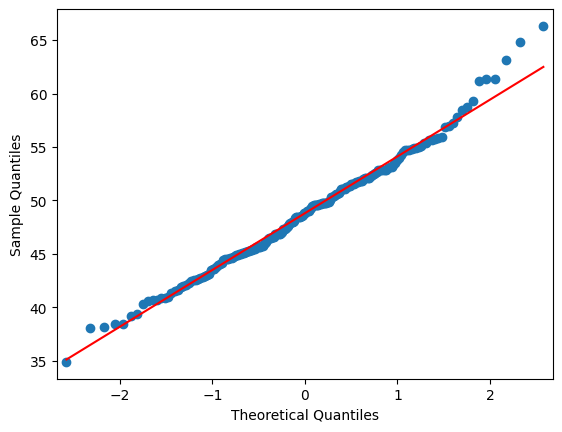

In [30]:
sm.ProbPlot(deliveryTimes['DeliveryTime_Hours']).qqplot(line='s')
plt.show()

In [33]:
ttest_ind(WarehouseA['DeliveryTime_Hours'], WarehouseB['DeliveryTime_Hours'])

TtestResult(statistic=np.float64(-3.631920841921735), pvalue=np.float64(0.0003582978644530451), df=np.float64(198.0))

Since the p-value 0.000358 is below the 0.05 we can reject the null hypothesis that states the two wearhouses have the same mean delivery time

In [36]:
meanA = WarehouseA['DeliveryTime_Hours'].mean()
meanB = WarehouseB['DeliveryTime_Hours'].mean()

In [37]:
print(meanA - meanB)

-2.653060109270008


On average Wearhouse A is 2.65 hours faster than Wearhouse B in delivery time hours